## Homes by Zip Code
We all know 'location, location, location' is an important determination for businesses as well as homes. Let's see what type of relationship, if any, exists in home prices between zip codes.

In [2]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [26]:
# Read in cleaned Kings County file 
df = pd.read_csv("cleaned_kings.csv")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


### Visualize price by zip codes

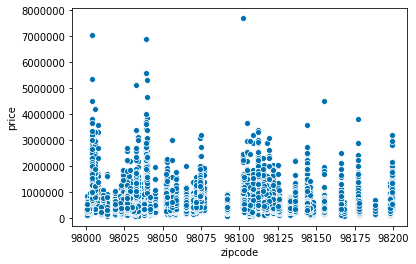

In [29]:
sns.scatterplot(x="zipcode", y="price", data=df)

### Zip codes are categorical and need special treatment


In [27]:
zipcodes = df['zipcode'].unique()

In [28]:
# Create dummy variables for each zipcode
zip_dummy = pd.get_dummies(df['zipcode'])
df_zips = pd.concat([df, zip_dummy], axis=1)
df_zips.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
